## Предсказание выброса СО2 в зависимости от характеристик автомобиля

### 1. Обработка данных

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#читаем  дадтафрейм
df = pd.read_csv('Original MY2000-2014 Fuel Consumption Ratings.csv', sep=',')

In [3]:
#знакомимся с данными
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14254 entries, 0 to 14253
Columns: 221 entries, MODEL to Unnamed: 220
dtypes: float64(209), object(12)
memory usage: 24.0+ MB


,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,...,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,...,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
14249,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6.0,AS6,X,11.9,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14250,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6.0,AS6,X,11.7,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14251,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6.0,AS6,X,11.9,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14252,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6.0,AS6,X,11.4,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14253,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6.0,AS6,X,13.3,8.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#переименовываем столбцы
df = df.rename(columns={'ENGINE SIZE': 'ENGINE SIZE (L)', 
                  'FUEL':'FUEL TYPE', 
                  'FUEL CONSUMPTION':'FUEL CONSUMPTION - CITY (L/100 km)',
                  'Unnamed: 9': 'FUEL CONSUMPTION - HWY (L/100 km)',
                  'Unnamed: 10': 'FUEL CONSUMPTION - COMB (L/100 km)',
                  'Unnamed: 11':'FUEL CONSUMPTION - COMB (mpg)',
                  'CO2 EMISSIONS ':'CO2 EMISSIONS (g/km)'
})
df = df.rename(str.lower, axis='columns')
for i in df.columns:
    print(i)

model
make
model.1
vehicle class
engine size (l)
cylinders
transmission
fuel type
fuel consumption - city (l/100 km)
fuel consumption - hwy (l/100 km)
fuel consumption - comb (l/100 km)
fuel consumption - comb (mpg)
co2 emissions (g/km)
unnamed: 13
unnamed: 14
unnamed: 15
unnamed: 16
unnamed: 17
unnamed: 18
unnamed: 19
unnamed: 20
unnamed: 21
unnamed: 22
unnamed: 23
unnamed: 24
unnamed: 25
unnamed: 26
unnamed: 27
unnamed: 28
unnamed: 29
unnamed: 30
unnamed: 31
unnamed: 32
unnamed: 33
unnamed: 34
unnamed: 35
unnamed: 36
unnamed: 37
unnamed: 38
unnamed: 39
unnamed: 40
unnamed: 41
unnamed: 42
unnamed: 43
unnamed: 44
unnamed: 45
unnamed: 46
unnamed: 47
unnamed: 48
unnamed: 49
unnamed: 50
unnamed: 51
unnamed: 52
unnamed: 53
unnamed: 54
unnamed: 55
unnamed: 56
unnamed: 57
unnamed: 58
unnamed: 59
unnamed: 60
unnamed: 61
unnamed: 62
unnamed: 63
unnamed: 64
unnamed: 65
unnamed: 66
unnamed: 67
unnamed: 68
unnamed: 69
unnamed: 70
unnamed: 71
unnamed: 72
unnamed: 73
unnamed: 74
unnamed: 75
unnamed

In [6]:
#удаляем неинформативные столбцы и строки
for i in df.columns:
    if i.startswith('unnamed'):
        df = df.drop(columns=i)
df = df.drop(index=0, columns =['model','make','model.1'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14253 entries, 1 to 14253
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   vehicle class                       14253 non-null  object 
 1   engine size (l)                     14253 non-null  object 
 2   cylinders                           14253 non-null  float64
 3   transmission                        14253 non-null  object 
 4   fuel type                           14253 non-null  object 
 5   fuel consumption - city (l/100 km)  14253 non-null  object 
 6   fuel consumption - hwy (l/100 km)   14253 non-null  object 
 7   fuel consumption - comb (l/100 km)  14253 non-null  object 
 8   fuel consumption - comb (mpg)       14253 non-null  object 
 9   co2 emissions (g/km)                14253 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.1+ MB


In [7]:
#проверяем наличие пропусков
df.isnull().sum()

vehicle class                         0
engine size (l)                       0
cylinders                             0
transmission                          0
fuel type                             0
fuel consumption - city (l/100 km)    0
fuel consumption - hwy (l/100 km)     0
fuel consumption - comb (l/100 km)    0
fuel consumption - comb (mpg)         0
co2 emissions (g/km)                  0
dtype: int64

In [8]:
#проверяем наличие дупликатов
dupl_columns = list(df.columns)
dupl_columns.remove('co2 emissions (g/km)')
mask = df.duplicated(subset=dupl_columns)
df_dupl=df[mask]
print(f'Число найденных дубликатов: {df_dupl.shape[0]}')

#удаляем дупликаты
df = df.drop_duplicates(subset=dupl_columns, ignore_index=True)
df.info()

Число найденных дубликатов: 5956
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8297 entries, 0 to 8296
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   vehicle class                       8297 non-null   object 
 1   engine size (l)                     8297 non-null   object 
 2   cylinders                           8297 non-null   float64
 3   transmission                        8297 non-null   object 
 4   fuel type                           8297 non-null   object 
 5   fuel consumption - city (l/100 km)  8297 non-null   object 
 6   fuel consumption - hwy (l/100 km)   8297 non-null   object 
 7   fuel consumption - comb (l/100 km)  8297 non-null   object 
 8   fuel consumption - comb (mpg)       8297 non-null   object 
 9   co2 emissions (g/km)                8297 non-null   object 
dtypes: float64(1), object(9)
memory usage: 648.3+ KB


In [9]:
#приводим к числовому типу данных необходимые столбцы
df_col = list(df.columns)
df_col.remove('vehicle class')
df_col.remove('transmission')
df_col.remove('fuel type')
for i in df_col:
    df[df_col] = df[df_col].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8297 entries, 0 to 8296
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   vehicle class                       8297 non-null   object 
 1   engine size (l)                     8297 non-null   float64
 2   cylinders                           8297 non-null   float64
 3   transmission                        8297 non-null   object 
 4   fuel type                           8297 non-null   object 
 5   fuel consumption - city (l/100 km)  8297 non-null   float64
 6   fuel consumption - hwy (l/100 km)   8297 non-null   float64
 7   fuel consumption - comb (l/100 km)  8297 non-null   float64
 8   fuel consumption - comb (mpg)       8297 non-null   float64
 9   co2 emissions (g/km)                8297 non-null   float64
dtypes: float64(7), object(3)
memory usage: 648.3+ KB


### 2. Разведывательный анализ

In [10]:
#выводим статистику по числовым данным
df.describe()

,engine size (l),cylinders,fuel consumption - city (l/100 km),fuel consumption - hwy (l/100 km),fuel consumption - comb (l/100 km),fuel consumption - comb (mpg),co2 emissions (g/km)
count,8297.000000,8297.000000,8297.000000,8297.000000,8297.000000,8297.000000,8297.000000
mean,3.417488,5.944679,12.836423,8.765771,11.005821,27.344703,248.680246
std,1.269135,1.741822,3.347375,2.231936,2.815220,7.145665,57.932973
min,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2.400000,4.000000,10.600000,7.300000,9.100000,22.000000,209.000000
50%,3.200000,6.000000,12.300000,8.300000,10.500000,27.000000,239.000000
75%,4.300000,8.000000,14.700000,10.100000,12.700000,31.000000,285.000000
max,8.400000,16.000000,30.600000,19.000000,24.800000,78.000000,570.000000


In [11]:
#статистика по классам двигателей
vehicle_class = df['vehicle class'].value_counts()
vehicle_class

vehicle class
SUV                         1438
COMPACT                     1309
MID-SIZE                    1150
PICKUP TRUCK - STANDARD      972
SUBCOMPACT                   812
TWO-SEATER                   425
FULL-SIZE                    423
STATION WAGON - SMALL        372
MINICOMPACT                  282
STATION WAGON - MID-SIZE     251
SUV - SMALL                  205
MINIVAN                      148
VAN - CARGO                  147
PICKUP TRUCK - SMALL         134
VAN - PASSENGER              110
SUV - STANDARD               107
SPECIAL PURPOSE VEHICLE       12
Name: count, dtype: int64

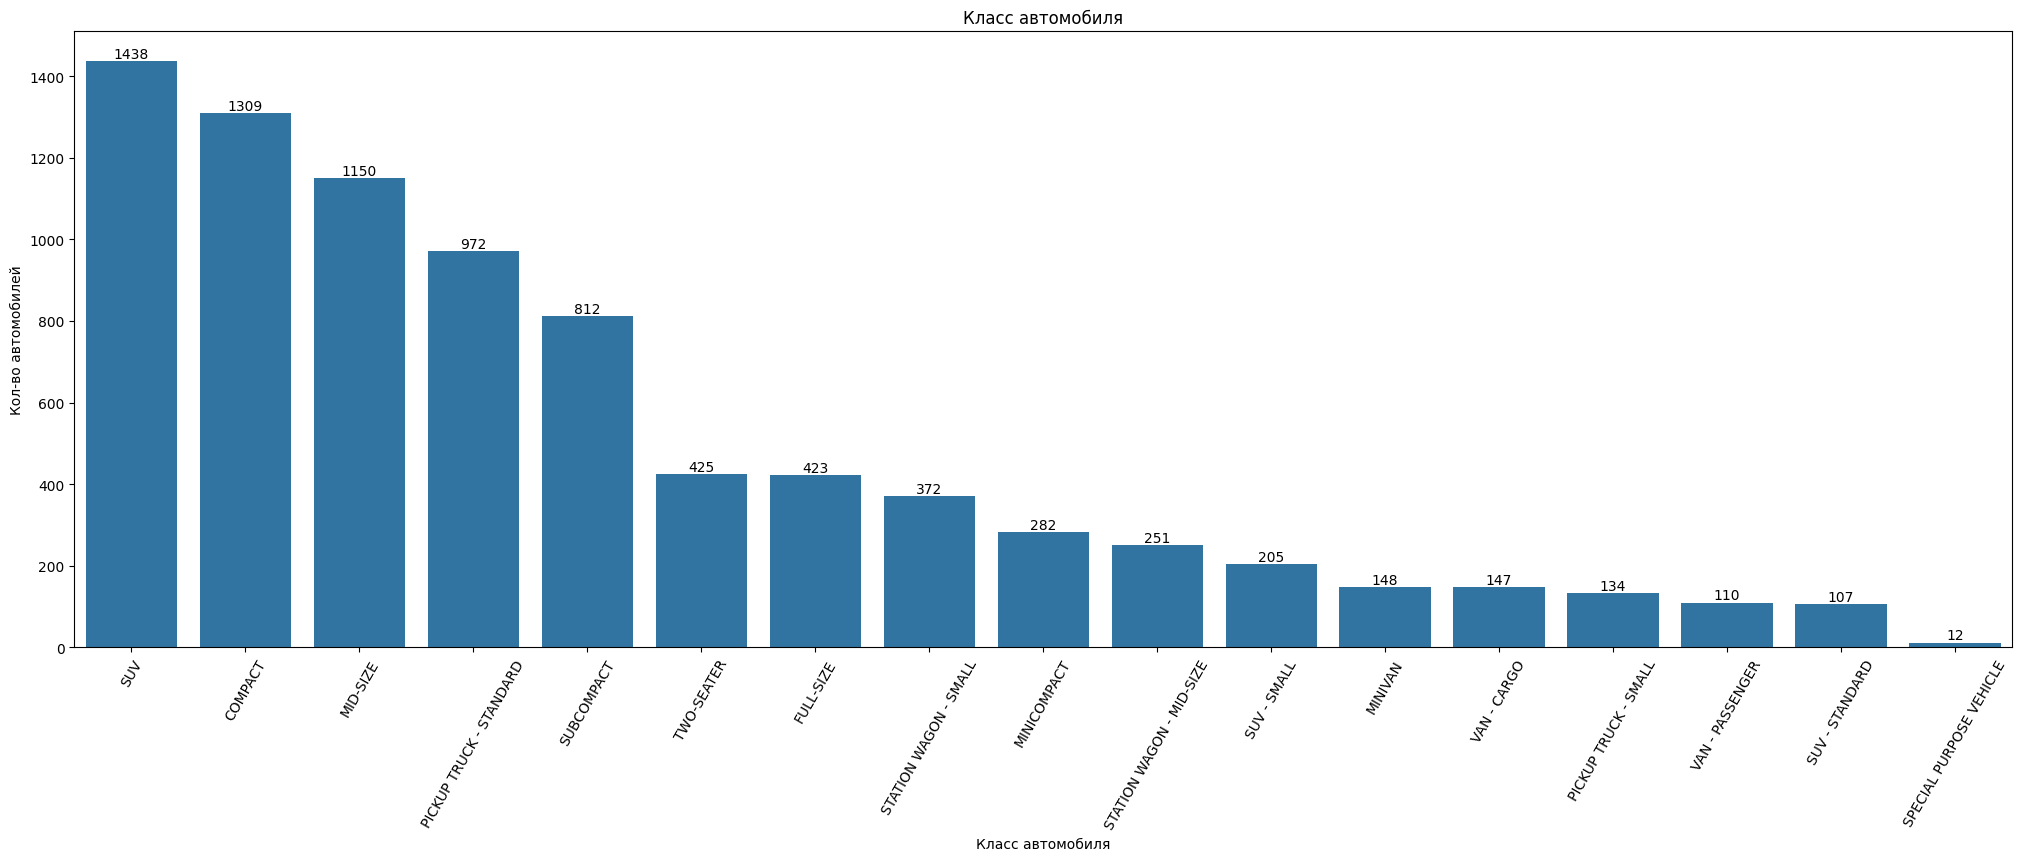

In [12]:
plt.figure(figsize=(25,8))
fig = sns.barplot(data = vehicle_class)
plt.xticks(rotation = 60)
plt.title('Класс автомобиля')
plt.xlabel('Класс автомобиля')
plt.ylabel('Кол-во автомобилей')
plt.bar_label(fig.containers[0])
plt.show()

In [13]:
#статистика по объему двигателя
engine_size = df['engine size (l)'].value_counts()
engine_size

engine size (l)
2.0    764
3.0    709
2.5    618
3.5    605
2.4    522
      ... 
8.4      2
0.8      2
2.1      2
6.3      1
4.1      1
Name: count, Length: 62, dtype: int64

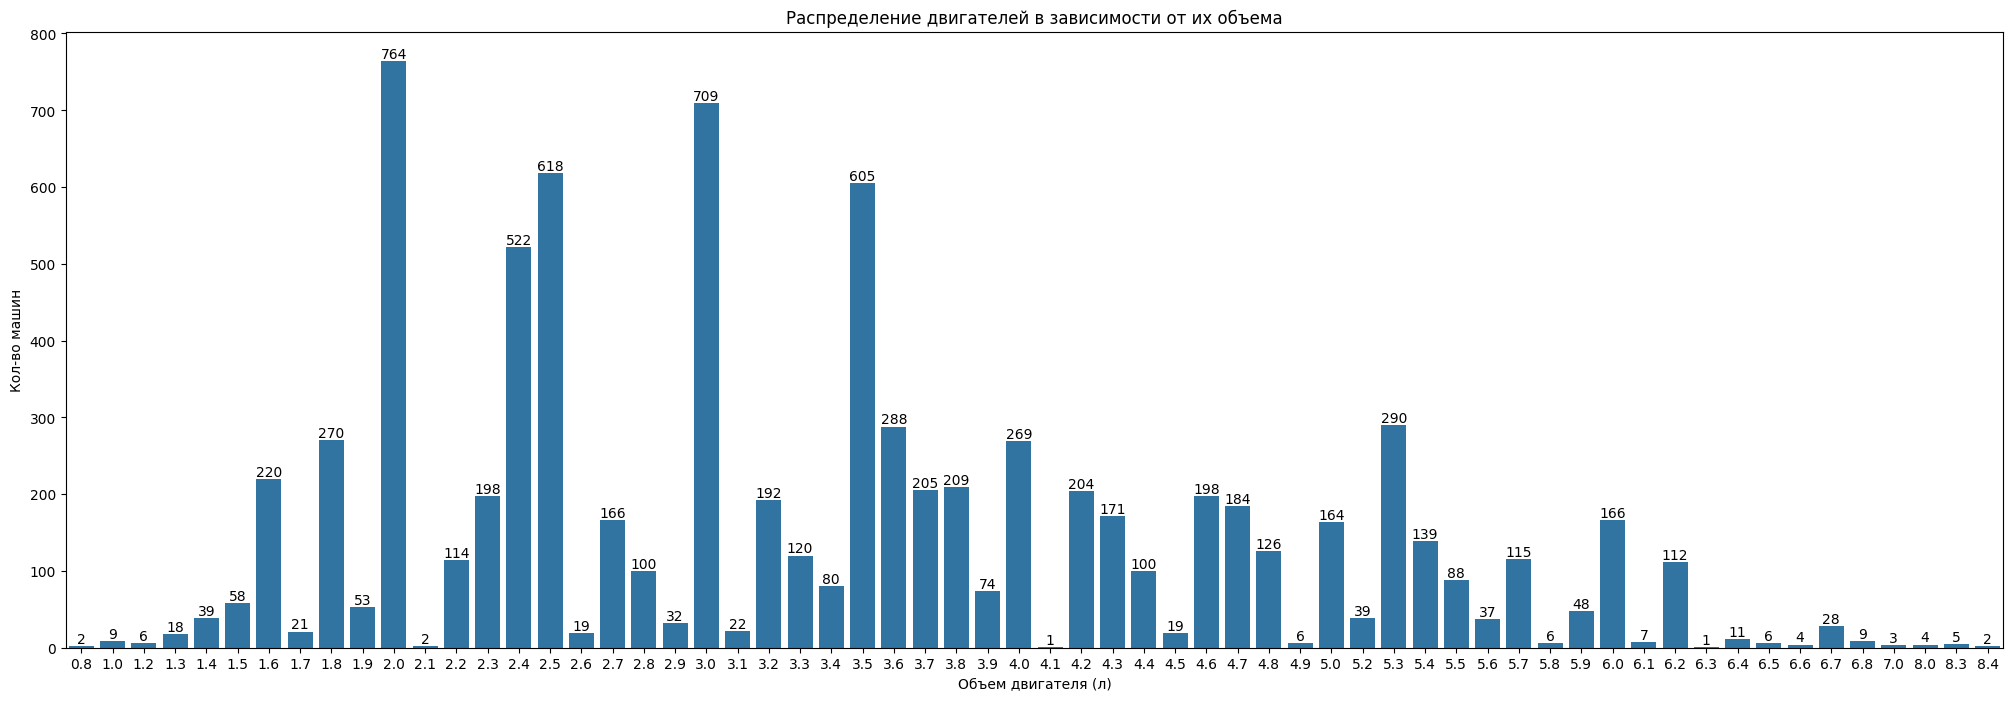

In [14]:
plt.figure(figsize=(25,8))
fig = sns.barplot(data = engine_size)
plt.title('Распределение двигателей в зависимости от их объема')
plt.xlabel('Объем двигателя (л)')
plt.ylabel('Кол-во машин')
plt.bar_label(fig.containers[0])
plt.show()

In [15]:
#статистика по цилиндрам
cylinders= df['cylinders'].value_counts()
cylinders

cylinders
6.0     3218
4.0     2579
8.0     1965
5.0      311
12.0     152
10.0      52
3.0       12
2.0        6
16.0       2
Name: count, dtype: int64

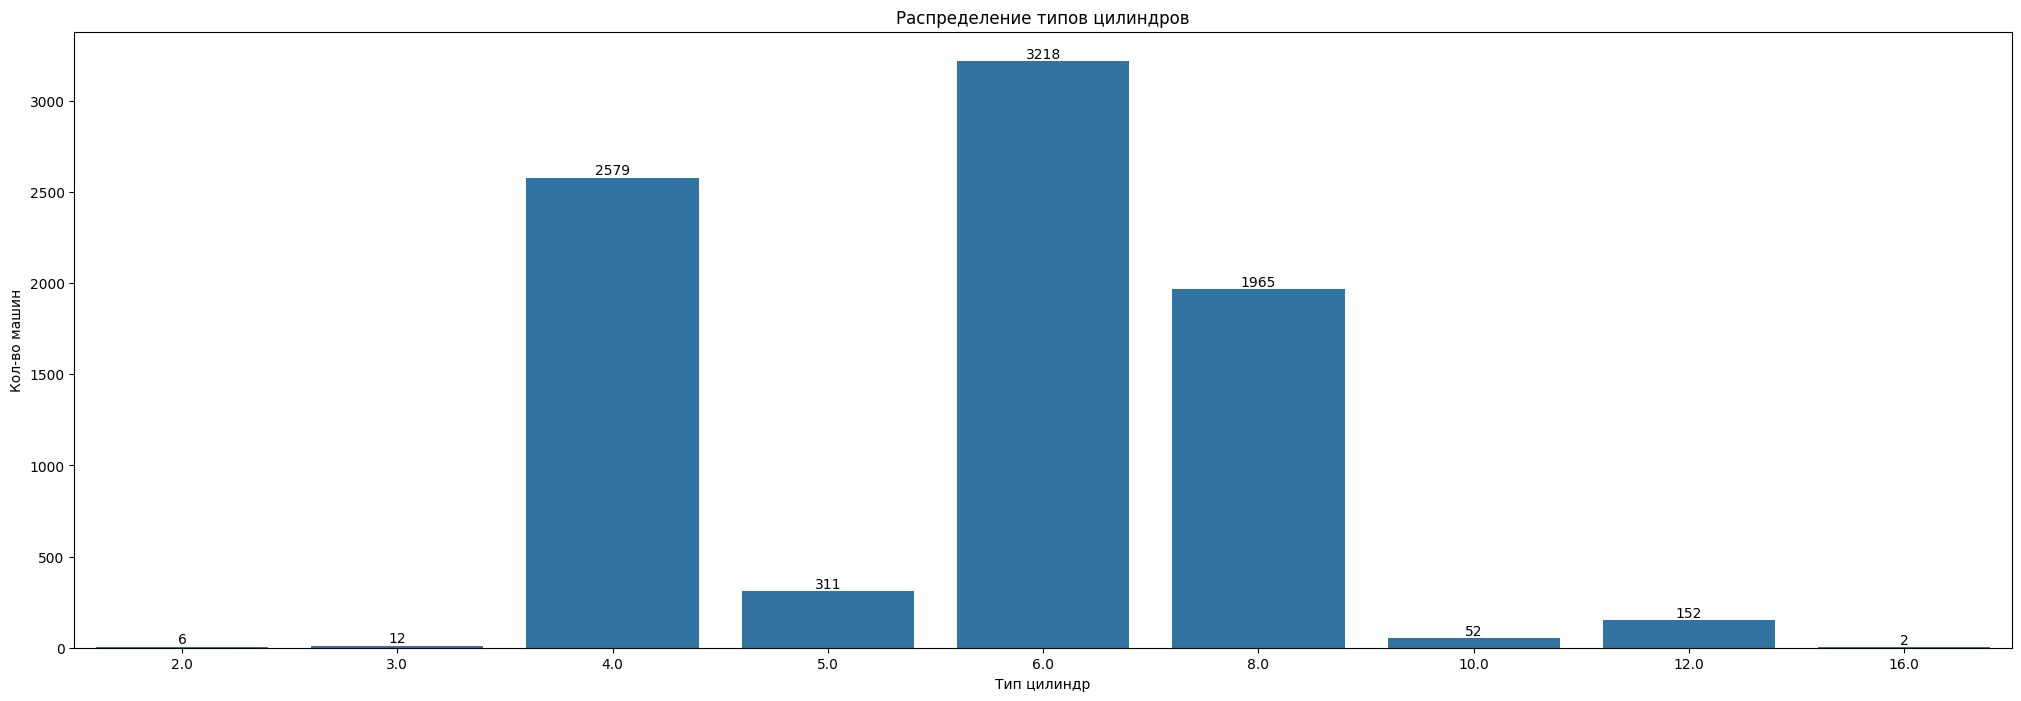

In [16]:
plt.figure(figsize=(25,8))
fig = sns.barplot(data = cylinders)
plt.title('Распределение типов цилиндров')
plt.xlabel('Тип цилиндр')
plt.ylabel('Кол-во машин')
plt.bar_label(fig.containers[0])
plt.show()

In [17]:
transmission = df['transmission'].value_counts()
transmission

transmission
A4     1879
M5     1182
AS6    1008
M6      956
A5      912
A6      629
AS5     546
AV      253
AS7     203
AS4     172
A7      172
A8      118
AS8      86
AM7      62
AM6      56
A3       20
AV6      14
M7        9
A9        8
AV7       6
AV8       3
M4        1
AM5       1
AS9       1
Name: count, dtype: int64

Объединим трансмиссии по группам согласно описанию к датафрейму:  
1. A - Автомат;
2. AM - Автоматическая ручная;
3. AS - Автоматическая с выбранным сдвигом;
4. AV - Бесступенчатая регулировка;
5. M - ручная.

In [18]:
df['transmission'] = np.where(df['transmission'].isin(['A3','A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']), 'Автомат', df['transmission'])
df['transmission'] = np.where(df['transmission'].isin(['AM5', 'AM6', 'AM7', 'AM8', 'AM9']), 'Автоматическая ручная', df['transmission'])
df['transmission'] = np.where(df['transmission'].isin(['AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9', 'AS10']), 'Автоматическая с выбранным сдвигом', df['transmission'])
df['transmission'] = np.where(df['transmission'].isin(['AV', 'AV6', 'AV7', 'AV8', 'AV10']), 'Бесступенчатая регулировка', df['transmission'])
df['transmission'] = np.where(df['transmission'].isin(['M4','M5', 'M6', 'M7']), 'Ручная', df['transmission'])

In [19]:
transmission = df['transmission'].value_counts()
transmission

transmission
Автомат                               3738
Ручная                                2148
Автоматическая с выбранным сдвигом    2016
Бесступенчатая регулировка             276
Автоматическая ручная                  119
Name: count, dtype: int64

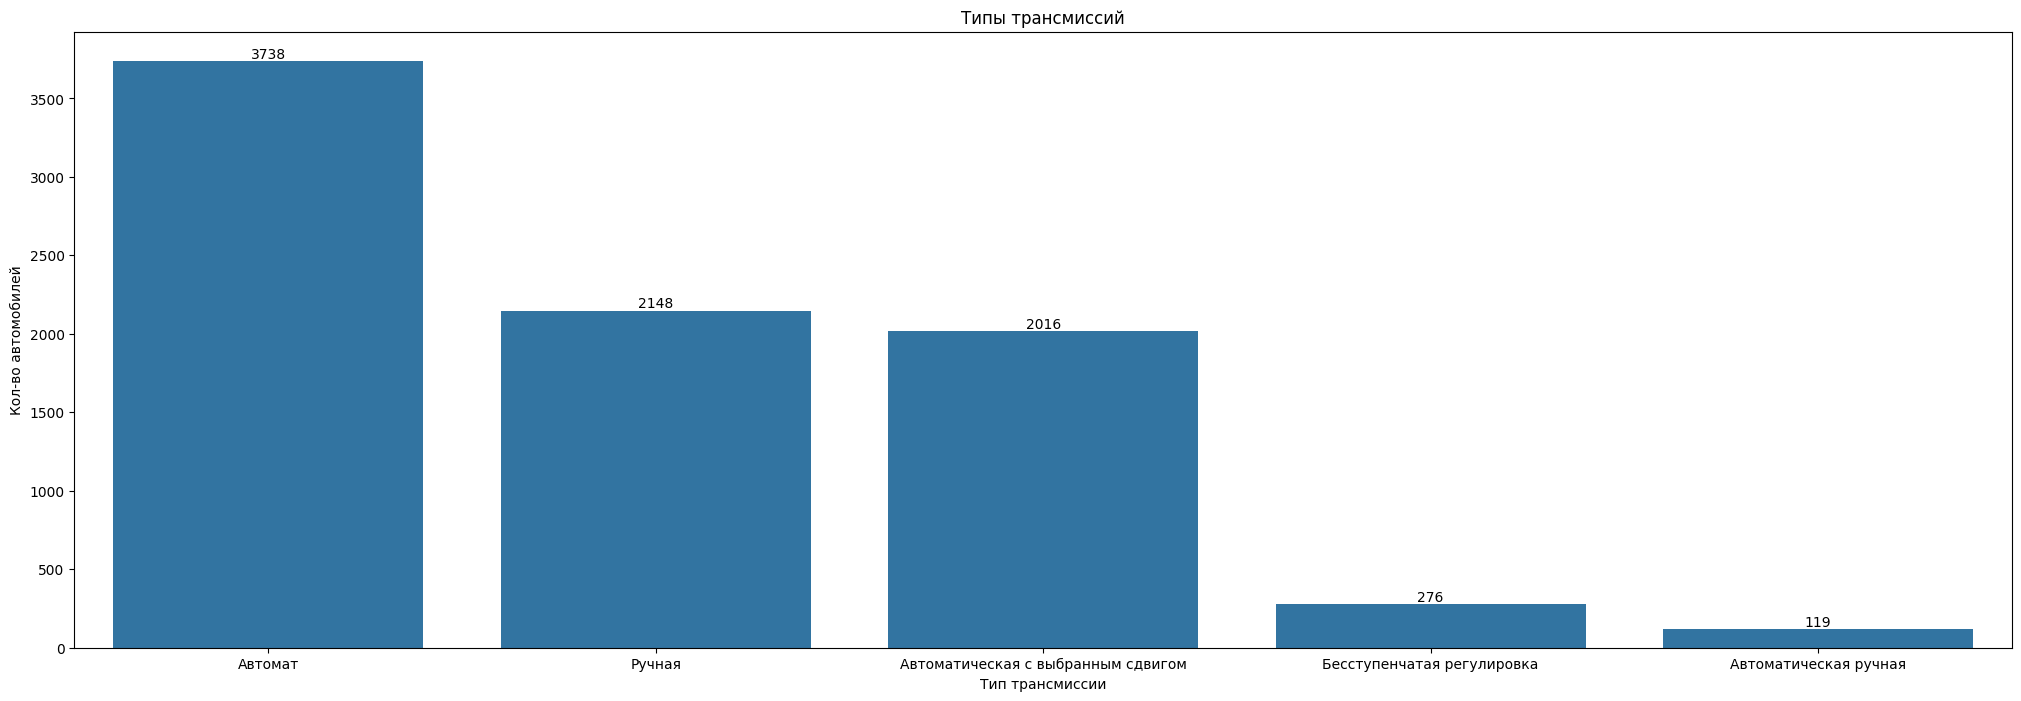

In [20]:
plt.figure(figsize=(25,8))
fig = sns.barplot(data = transmission)
plt.title('Типы трансмиссий')
plt.xlabel('Тип трансмиссии')
plt.ylabel('Кол-во автомобилей')
plt.bar_label(fig.containers[0])
plt.show()

In [21]:
fuel_type = df['fuel type'].value_counts()
fuel_type

fuel type
X    4520
Z    3353
E     326
D      78
N      20
Name: count, dtype: int64

Расшифровка значений:
1. X - Обычный бензин;
2. Z - Бензин премиум-класса;
3. D - Дизельное топливо;
4. E - Этанол;
5. N - Природный газ.

In [22]:
# заменяем буквенные сокращения на расшифровку
df['fuel type'] = np.where(df['fuel type']=='Z', 'Обычный бензин', df['fuel type'])
df['fuel type'] = np.where(df['fuel type']=='Z', 'Бензин премиум-класса', df['fuel type'])
df['fuel type'] = np.where(df['fuel type']=='D', 'Дизельное топливо', df['fuel type'])
df['fuel type'] = np.where(df['fuel type']=='E', 'Этанол', df['fuel type'])
df['fuel type'] = np.where(df['fuel type']=='N', 'Природный газ', df['fuel type'])

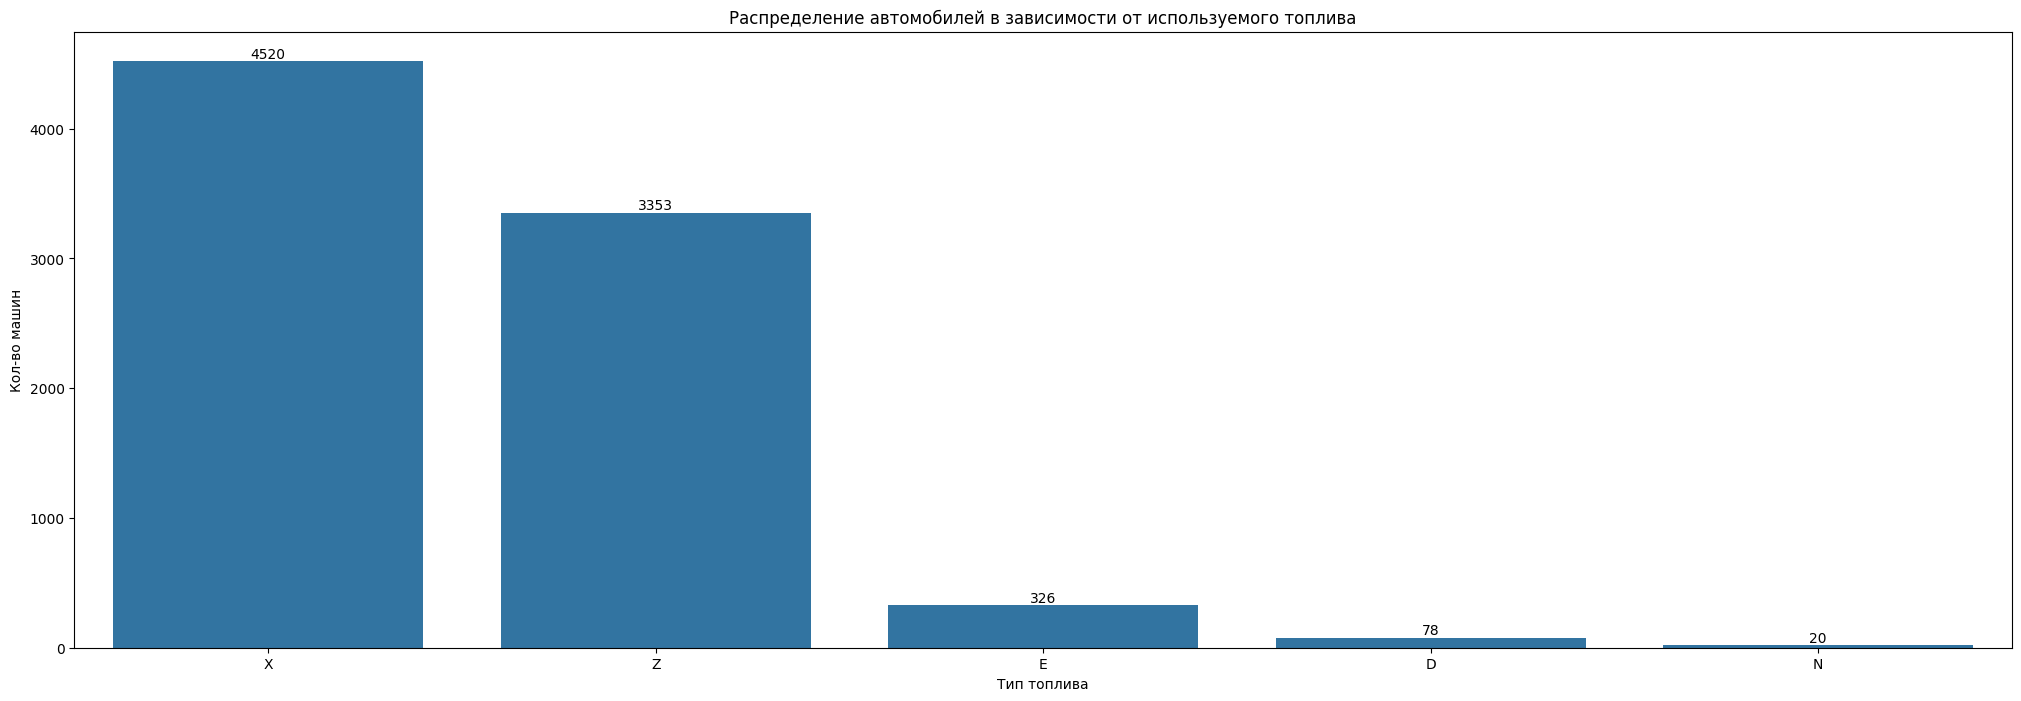

In [23]:
plt.figure(figsize=(25,8))
fig = sns.barplot(data =fuel_type)
plt.title('Распределение автомобилей в зависимости от используемого топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Кол-во машин')
plt.bar_label(fig.containers[0])
plt.show()

#### Изменение выбросов CO2 в зависимости от различных характеристик

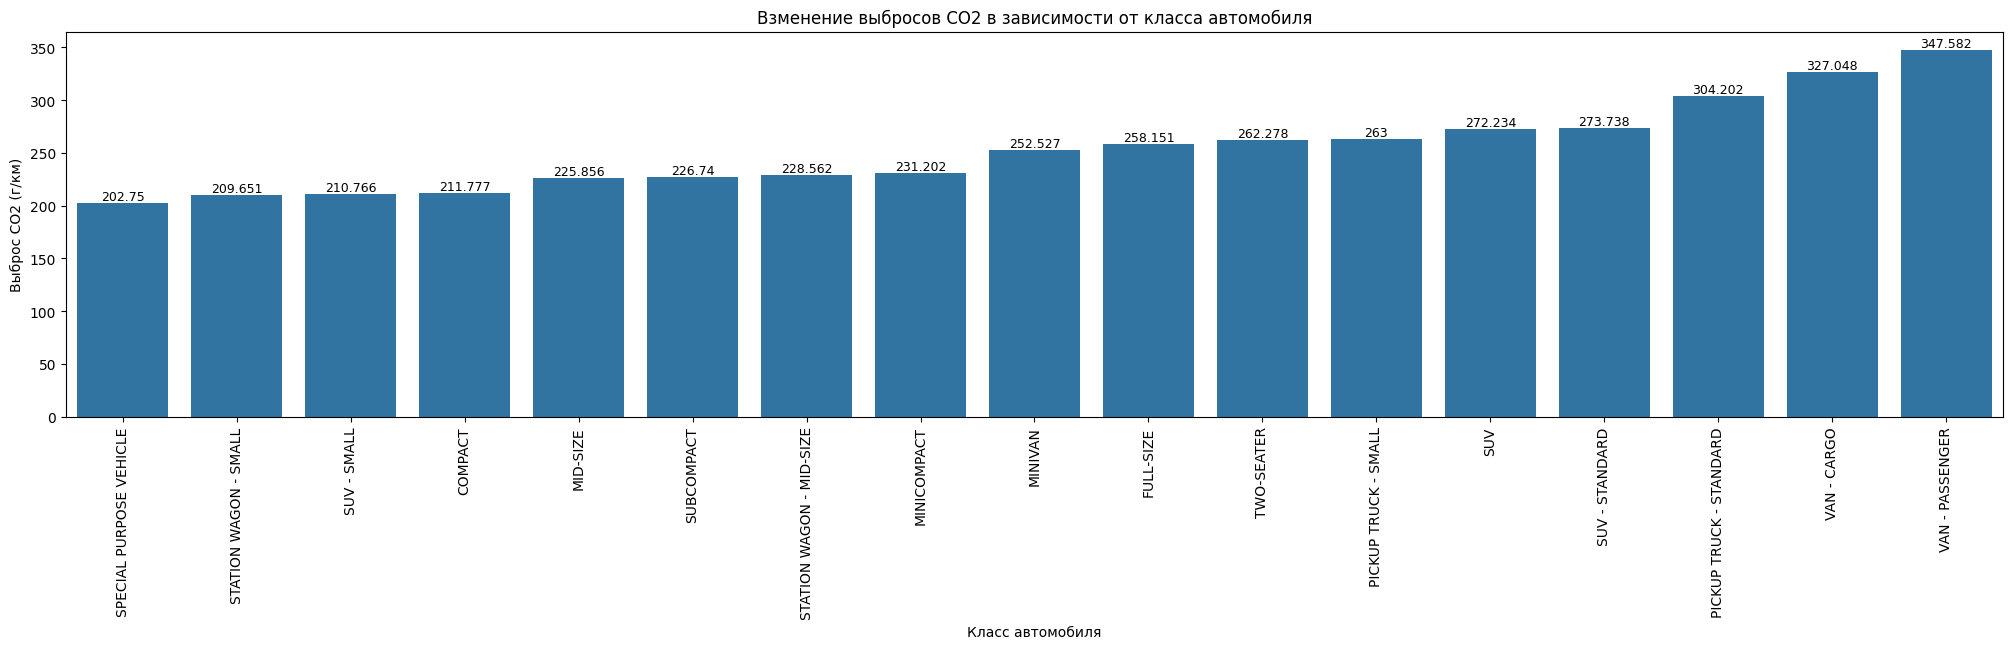

In [24]:
#изменение выбросов CO2 в зависимости от класса автомобиля
emission_vehicle = df.groupby(['vehicle class'])['co2 emissions (g/km)'].mean().sort_values().reset_index()
plt.figure(figsize=(25,5))
figure9 = sns.barplot(data = emission_vehicle , x = 'vehicle class',  y= 'co2 emissions (g/km)')
plt.xticks(rotation = 90)
plt.title('Bзменение выбросов CO2 в зависимости от класса автомобиля')
plt.xlabel('Класс автомобиля')
plt.ylabel('Выброс СО2 (г/км)')
plt.bar_label(figure9.containers[0], fontsize=9)
plt.show()

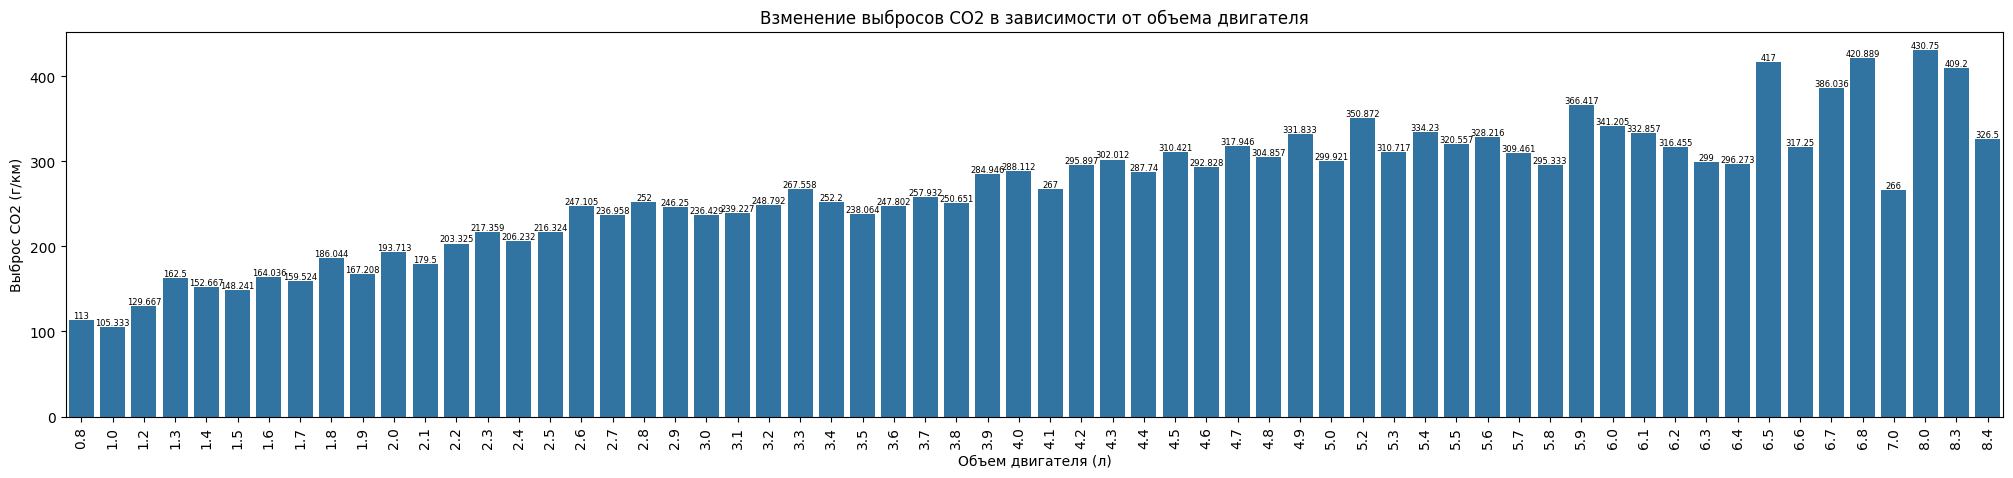

In [25]:
#изменение выбросов CO2 в зависимости от объема двигателя
emission_engine = df.groupby(['engine size (l)'])['co2 emissions (g/km)'].mean().sort_values().reset_index()
plt.figure(figsize=(25,5))
figure9 = sns.barplot(data = emission_engine , x = 'engine size (l)',  y= 'co2 emissions (g/km)')
plt.xticks(rotation = 90)
plt.title('Bзменение выбросов CO2 в зависимости от объема двигателя')
plt.xlabel('Объем двигателя (л)')
plt.ylabel('Выброс СО2 (г/км)')
plt.bar_label(figure9.containers[0], fontsize=6)
plt.show()

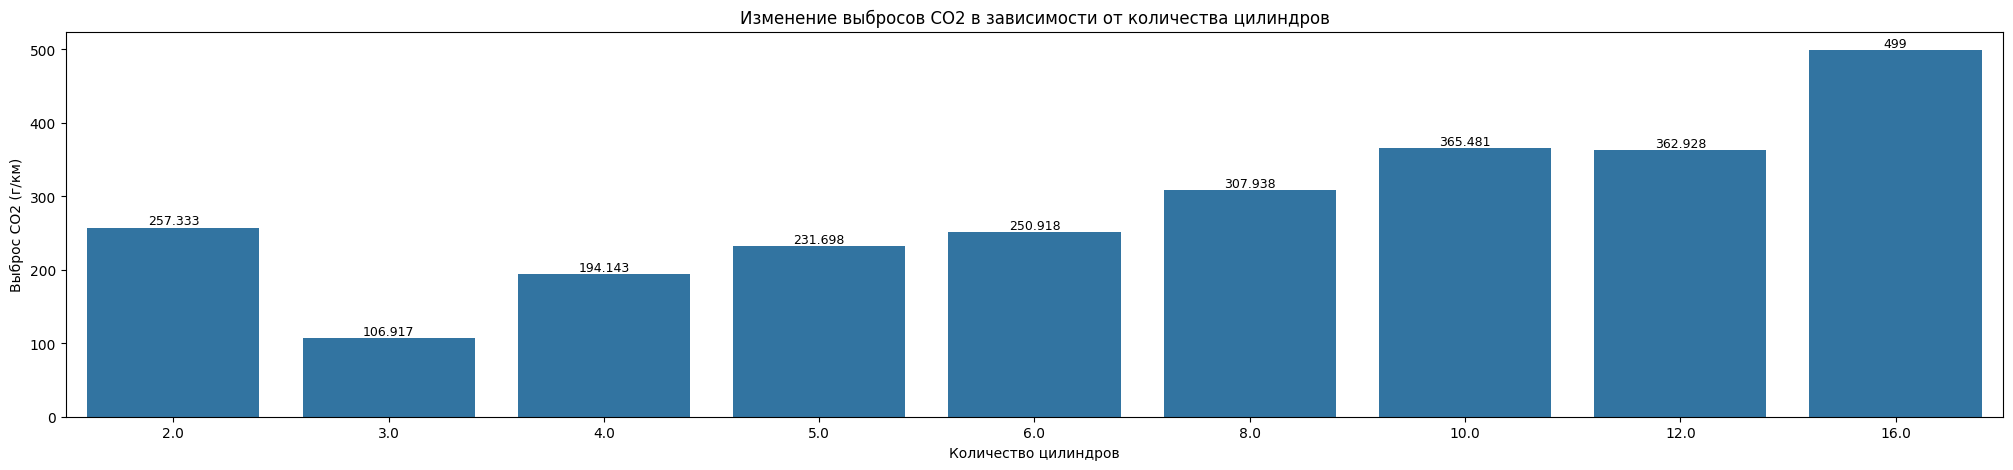

In [26]:
#изменение выбросов CO2 в зависимости от количества цилиндров
emission_cylinders = df.groupby(['cylinders'])['co2 emissions (g/km)'].mean().sort_values().reset_index()
plt.figure(figsize=(25,5))
figure9 = sns.barplot(data = emission_cylinders , x = 'cylinders',  y= 'co2 emissions (g/km)')
plt.title('Изменение выбросов CO2 в зависимости от количества цилиндров')
plt.xlabel('Количество цилиндров')
plt.ylabel('Выброс СО2 (г/км)')
plt.bar_label(figure9.containers[0], fontsize=9)
plt.show()

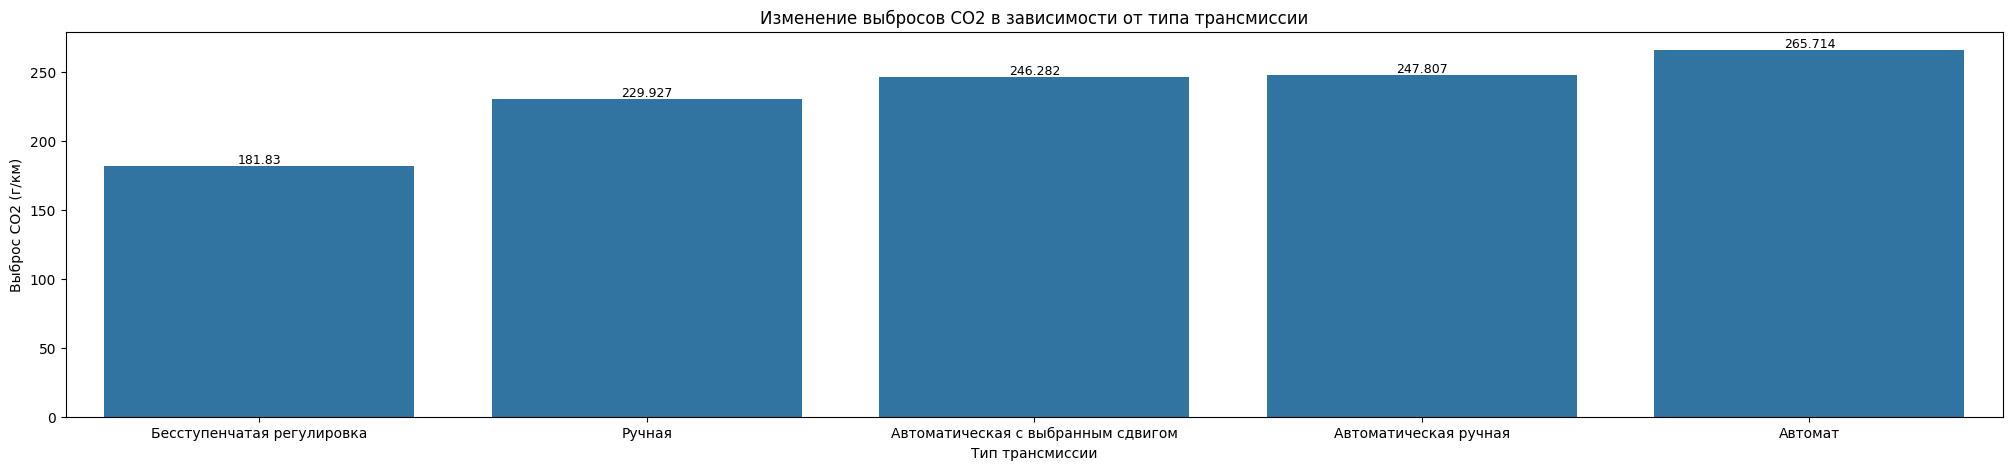

In [27]:
#изменение выбросов CO2 в зависимости от типа трансмиссии
emission_transmission = df.groupby(['transmission'])['co2 emissions (g/km)'].mean().sort_values().reset_index()
plt.figure(figsize=(25,5))
figure9 = sns.barplot(data = emission_transmission , x = 'transmission',  y= 'co2 emissions (g/km)')
plt.title('Изменение выбросов CO2 в зависимости от типа трансмиссии')
plt.xlabel('Тип трансмиссии')
plt.ylabel('Выброс СО2 (г/км)')
plt.bar_label(figure9.containers[0], fontsize=9)
plt.show()

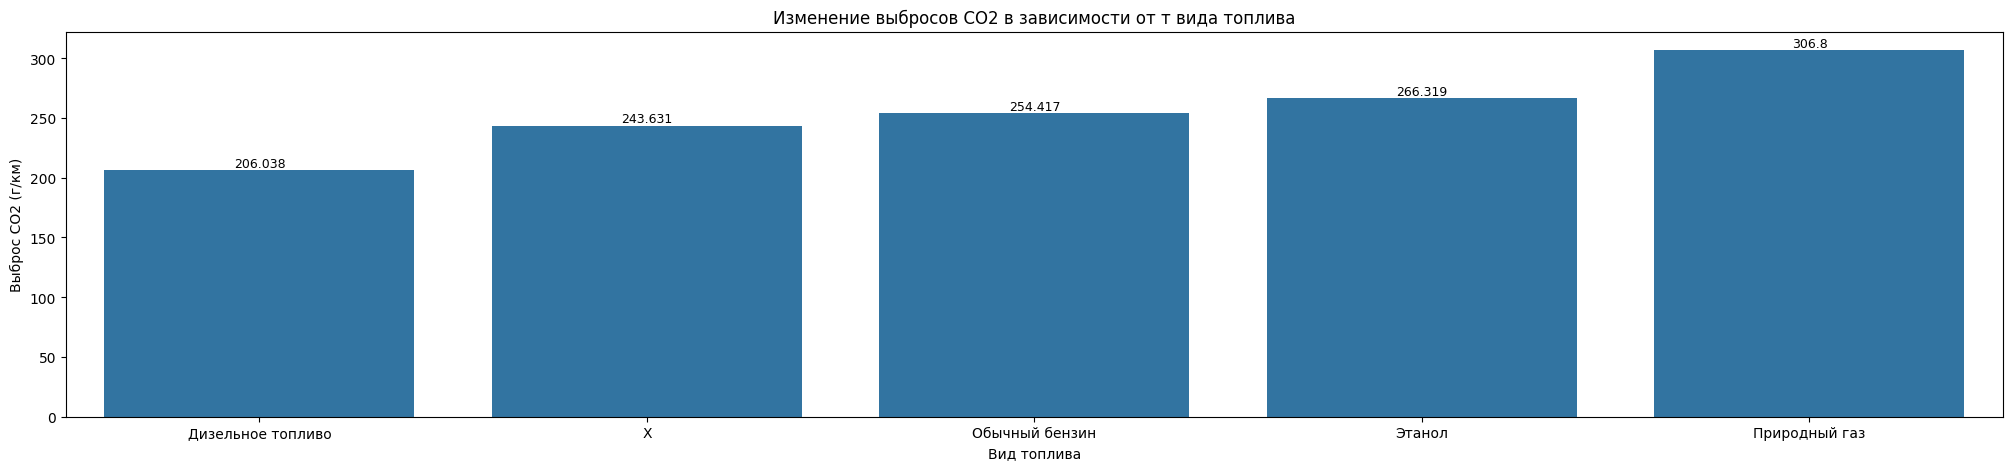

In [28]:
#изменение выбросов CO2 в зависимости от вида топлива
emission_fuel = df.groupby(['fuel type'])['co2 emissions (g/km)'].mean().sort_values().reset_index()
plt.figure(figsize=(25,5))
figure9 = sns.barplot(data = emission_fuel , x = 'fuel type',  y= 'co2 emissions (g/km)')
plt.title('Изменение выбросов CO2 в зависимости от т вида топлива')
plt.xlabel('Вид топлива')
plt.ylabel('Выброс СО2 (г/км)')
plt.bar_label(figure9.containers[0], fontsize=9)
plt.show()

## Создание моделей

Проверям корреляция признаков

In [29]:
#df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Transmission','Fuel Consumption Comb (mpg)'],inplace=True,axis=1)
df_correlation = df[['engine size (l)','cylinders','fuel consumption - comb (l/100 km)','co2 emissions (g/km)']]
display(df_correlation.head())
display(df_correlation.info())

,engine size (l),cylinders,fuel consumption - comb (l/100 km),co2 emissions (g/km)
0,1.6,4.0,8.1,186.0
1,1.6,4.0,7.6,175.0
2,3.2,6.0,10.0,230.0
3,3.5,6.0,11.5,264.0
4,1.8,4.0,8.6,198.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8297 entries, 0 to 8296
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   engine size (l)                     8297 non-null   float64
 1   cylinders                           8297 non-null   float64
 2   fuel consumption - comb (l/100 km)  8297 non-null   float64
 3   co2 emissions (g/km)                8297 non-null   float64
dtypes: float64(4)
memory usage: 259.4 KB


None

In [30]:
df_correlation.corr()

,engine size (l),cylinders,fuel consumption - comb (l/100 km),co2 emissions (g/km)
engine size (l),1.000000,0.904201,0.810716,0.827311
cylinders,0.904201,1.000000,0.758146,0.785843
fuel consumption - comb (l/100 km),0.810716,0.758146,1.000000,0.932547
co2 emissions (g/km),0.827311,0.785843,0.932547,1.000000


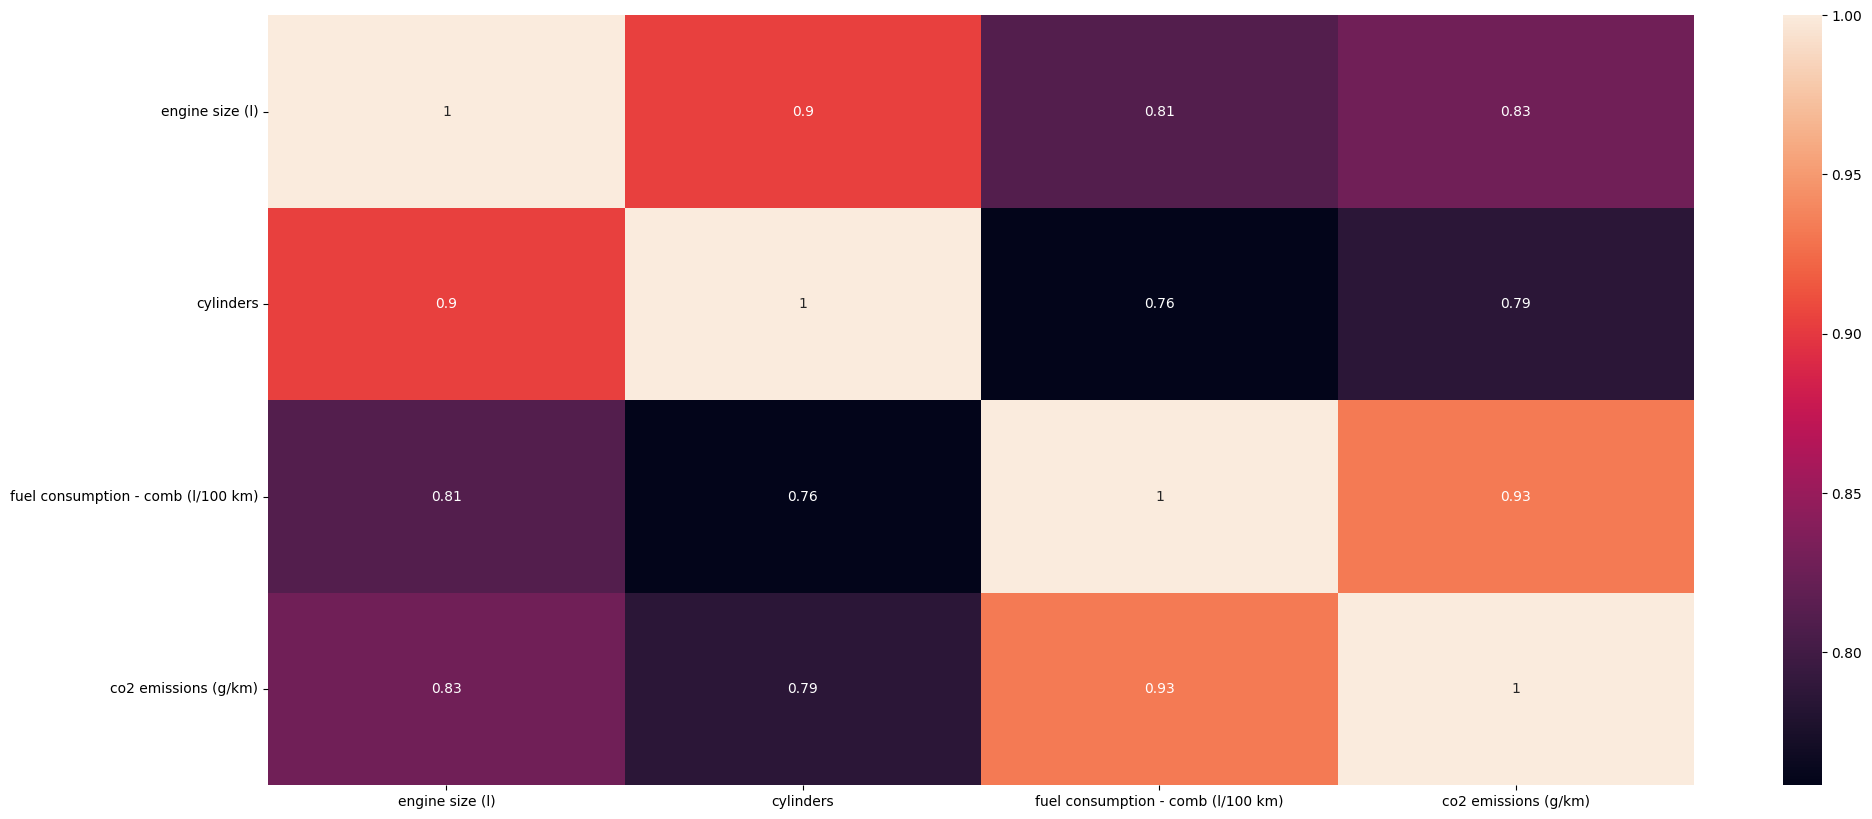

In [31]:
# тепловая диаграмма корреляции признаков, чтобы наглядно оценить вклад каждого признака
plt.figure(figsize = (23,10))
sns.heatmap(df_correlation.corr(), annot = True)
plt.show()

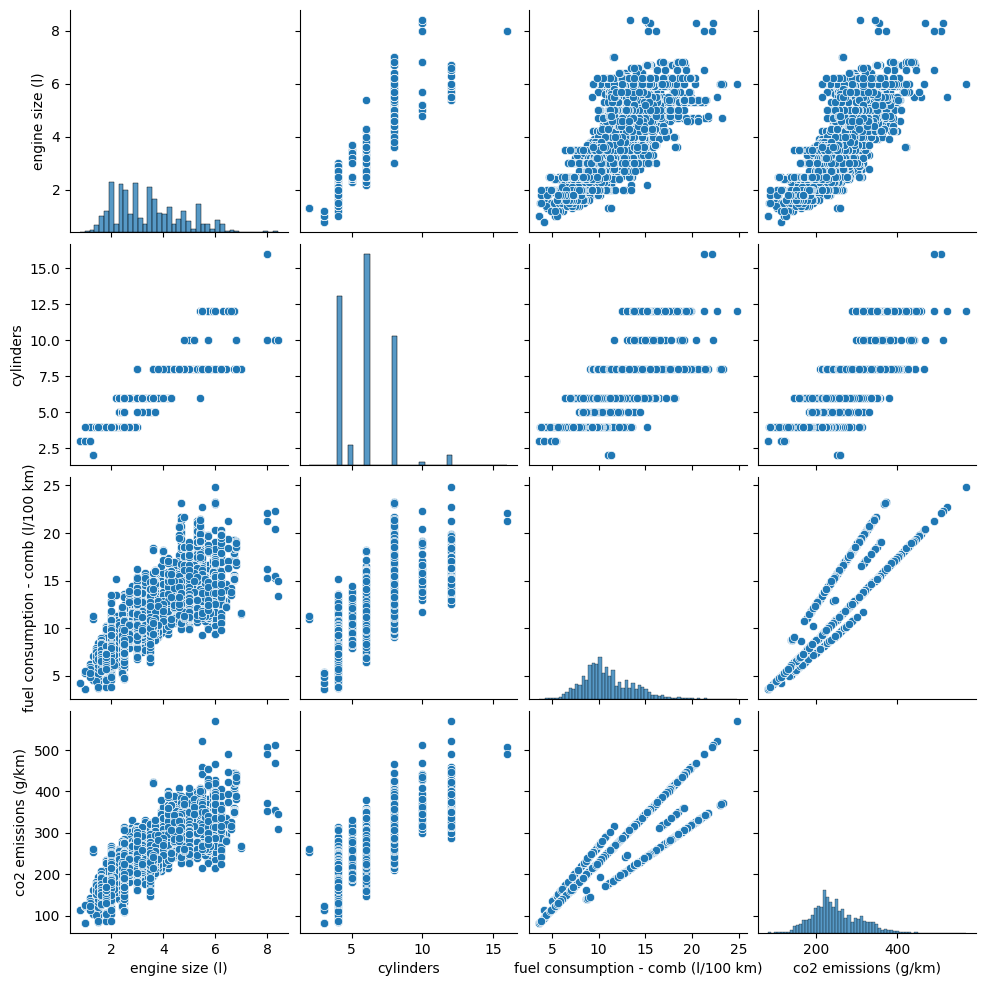

In [32]:
sns.pairplot(df_correlation)

Проверка на выбросы

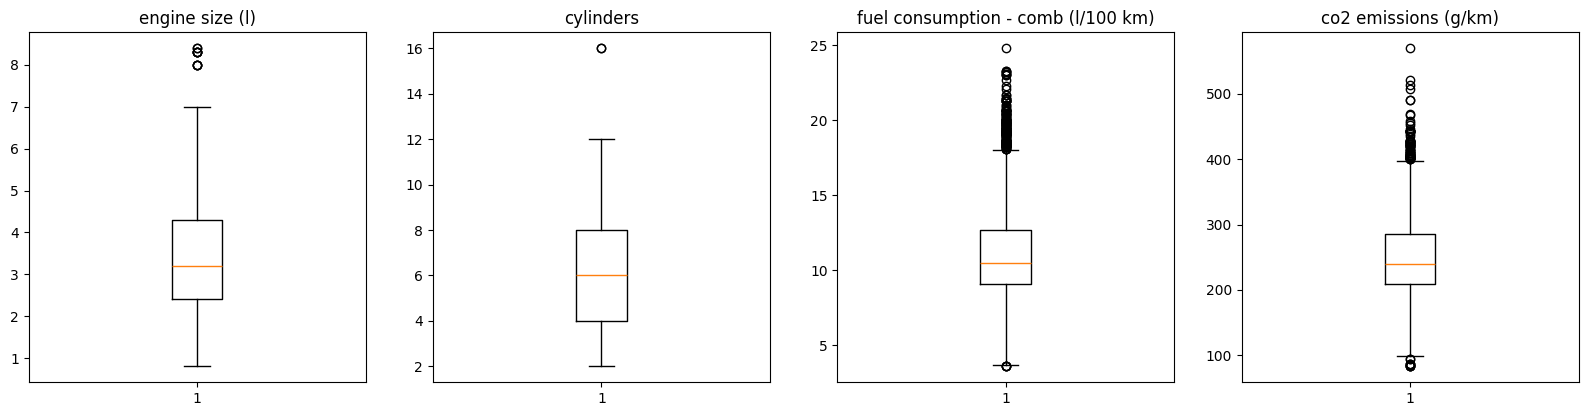

In [33]:
plt.figure(figsize = (20,10))
for i in enumerate(df_correlation):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_correlation[i[1]])

Удаляем выбросы

In [34]:
df_new = df_correlation[(np.abs(stats.zscore(df_correlation)) < 1.65).all(axis=1)]

In [35]:
df_new.reset_index(drop=True, inplace=True)

In [36]:
df_new.head()

,engine size (l),cylinders,fuel consumption - comb (l/100 km),co2 emissions (g/km)
0,1.6,4.0,8.1,186.0
1,1.6,4.0,7.6,175.0
2,3.2,6.0,10.0,230.0
3,3.5,6.0,11.5,264.0
4,1.8,4.0,8.6,198.0


In [37]:
print("Количество строк в изначальном датасэте : " , len(df))
print("Размер датасэта после удаления выбросов : " , len(df_new))
print(f"Было удалено {len(df_correlation)-len(df_new)} выбросов")

Количество строк в изначальном датасэте :  8297
Размер датасэта после удаления выбросов :  6962
Было удалено 1335 выбросов


Построение боксплотов после удаления выбросов

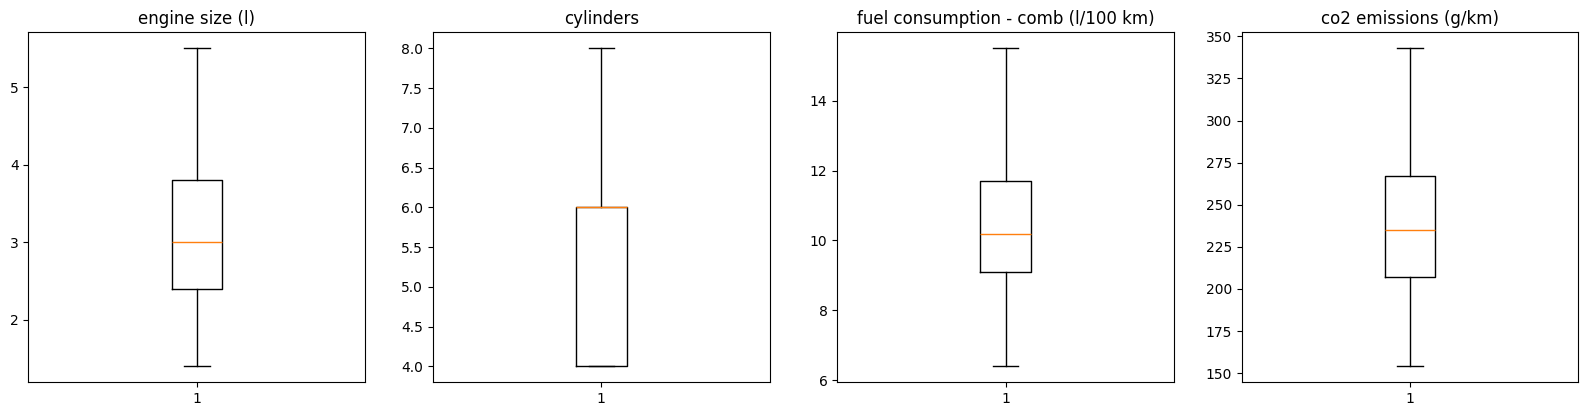

In [38]:
plt.figure(figsize = (20,10))
for i in enumerate(df_new):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_new[i[1]])

Статистические показания до удаления выбросов

In [39]:
df_correlation.describe().T

,count,mean,std,min,25%,50%,75%,max
engine size (l),8297.0,3.417488,1.269135,0.8,2.4,3.2,4.3,8.4
cylinders,8297.0,5.944679,1.741822,2.0,4.0,6.0,8.0,16.0
fuel consumption - comb (l/100 km),8297.0,11.005821,2.815220,3.6,9.1,10.5,12.7,24.8
co2 emissions (g/km),8297.0,248.680246,57.932973,83.0,209.0,239.0,285.0,570.0


Статистические показания после удаления выбросов

In [40]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
engine size (l),6962.0,3.157412,0.981197,1.4,2.4,3.0,3.8,5.5
cylinders,6962.0,5.618357,1.378982,4.0,4.0,6.0,6.0,8.0
fuel consumption - comb (l/100 km),6962.0,10.476242,1.953424,6.4,9.1,10.2,11.7,15.5
co2 emissions (g/km),6962.0,239.526286,43.836779,154.0,207.0,235.0,267.0,343.0


Подготовка тествого набора

In [41]:
sample_df=df_new.sample(n=200,random_state=35)
sample_df.head()

,engine size (l),cylinders,fuel consumption - comb (l/100 km),co2 emissions (g/km)
4235,4.2,8.0,14.8,340.0
4740,3.0,6.0,10.8,292.0
6207,3.6,6.0,10.7,246.0
146,3.9,6.0,14.5,334.0
1172,3.5,6.0,9.6,221.0


In [42]:
# удаление тестового набора из нашего датасэета
indexs=sample_df.index
indexs


Index([4235, 4740, 6207,  146, 1172, 5541, 3974,  617, 6814, 1664,
       ...
       4566, 3819, 2958, 4698, 3781,  157,  301, 4937, 1441,  361],
      dtype='int64', length=200)

In [43]:
for i in indexs:
    df_new.drop(i, axis = 0,inplace = True)

Разбиваем тестовую выборку на датасет признаков и результат 

In [44]:
sample_df_Xtest=sample_df.drop(['co2 emissions (g/km)'],axis=1)
sample_df_ytest=sample_df["co2 emissions (g/km)"]

Нормализация признаков тестовой выборки

In [45]:
new=sample_df_Xtest.astype(np.float32)
sample_df_Xtest = (new - np.min(new)) / (np.max(new) - np.min(new))
sample_df_Xtest["engine size (l)"]=sample_df_Xtest["engine size (l)"].map(lambda x:round(x,2))
sample_df_Xtest["cylinders"]=sample_df_Xtest["cylinders"].map(lambda x:round(x,2))
sample_df_Xtest["fuel consumption - comb (l/100 km)"]=sample_df_Xtest["fuel consumption - comb (l/100 km)"].map(lambda x:round(x,2))
sample_df_Xtest.head()

,engine size (l),cylinders,fuel consumption - comb (l/100 km)
4235,0.19,0.46,0.95
4740,0.11,0.32,0.66
6207,0.15,0.32,0.66
146,0.17,0.32,0.93
1172,0.14,0.32,0.58


Нормализция тренировочного набора

In [46]:
X = df_new.drop(['co2 emissions (g/km)'], axis= 1).astype(np.float32)
y = df_new["co2 emissions (g/km)"].astype(np.float32)

In [47]:
X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [48]:
X.head()

,engine size (l),cylinders,fuel consumption - comb (l/100 km)
0,0.014184,0.184397,0.475177
1,0.014184,0.184397,0.439716
2,0.127660,0.326241,0.609929
3,0.148936,0.326241,0.716312
4,0.028369,0.184397,0.510638


In [49]:
y.head()

0    186.0
1    175.0
2    230.0
3    264.0
4    198.0
Name: co2 emissions (g/km), dtype: float32

Разделения нашей тестовой выборки на train и test для тренировки модели

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (5409, 3)
y_train (5409,)
X_test (1353, 3)
y_test (1353,)


### Создание модели

In [51]:
# Импорт библиотек
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

Модель линейной регрессии (Lnear Regression)

In [52]:
def train_linear_regression_model(X_train, y_train):
    model = LinearRegression().fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    lin_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, lin_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_Linear": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_Linear"] = result_pred["Pred_Linear"].round(2)
    result_pred["Diff"] = result_pred["Pred_Linear"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff


model_lrgr = train_linear_regression_model(X_train, y_train)
train_rmse, test_rmse, r2_train, lin_r2_score = evaluate_model(model_lrgr, X_train, y_train, X_test, y_test)
print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"R^2 score on Training Data: {r2_train}")
print(f"Cross-validated R^2 score: {lin_r2_score}")
linear_regression_pred, mean_diff = predict_and_compare(model_lrgr, sample_df_Xtest, sample_df_ytest)
print(f"Mean Difference: {mean_diff}")

Training RMSE: 11.914192199707031
Testing RMSE: 12.091781616210938
R^2 score on Training Data: 0.9250090428863141
Cross-validated R^2 score: 0.9238556155007901
Mean Difference: 6.428349999999999


In [53]:
linear_regression_pred.head(20)

,Pred_Linear,Real_Value,Diff
0,329.37,340.0,-10.63
1,243.36,292.0,-48.64
2,245.73,246.0,-0.27
3,321.67,334.0,-12.33
4,222.98,221.0,1.98
5,182.86,182.0,0.86
6,212.81,214.0,-1.19
7,216.07,218.0,-1.93
8,334.74,245.0,89.74
9,228.94,235.0,-6.06


Случайный лес (RF (Random Forest))

In [54]:
def train_random_forest_model(X_train, y_train):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    rf_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, rf_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_RF": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_RF"] = result_pred["Pred_RF"].round(2)
    result_pred["Diff"] = result_pred["Pred_RF"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff
   
model_rf = train_random_forest_model(X_train, y_train)
train_rmse, test_rmse, r2_train, rf_r2_score = evaluate_model(model_rf, X_train, y_train, X_test, y_test)
print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"R^2 score on Training Data: {r2_train}")
print(f"Cross-validated R^2 score: {rf_r2_score}")
random_forest_pred, mean_diff = predict_and_compare(model_rf, sample_df_Xtest, sample_df_ytest)
print(f"Mean Difference: {mean_diff}")

Training RMSE: 5.579230257034371
Testing RMSE: 8.77574630639181
R^2 score on Training Data: 0.9835552108198191
Cross-validated R^2 score: 0.9562016548974649
Mean Difference: 3.5512


In [55]:
random_forest_pred.head(20)

,Pred_RF,Real_Value,Diff
0,340.00,340.0,0.00
1,252.98,292.0,-39.02
2,246.00,246.0,0.00
3,263.18,334.0,-70.82
4,221.00,221.0,0.00
5,181.95,182.0,-0.05
6,214.00,214.0,0.00
7,216.00,218.0,-2.00
8,240.19,245.0,-4.81
9,232.00,235.0,-3.00


Метод k-ближайших соседей (k-nearest neighbors algorithm)

In [56]:
def train_knn_model(X_train, y_train):
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    knn_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, knn_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_KNN": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_KNN"] = result_pred["Pred_KNN"].map(lambda x:round(x,2))
    result_pred["Diff"] = result_pred["Pred_KNN"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff


model_knn = train_knn_model(X_train, y_train)
train_rmse, test_rmse, r2_train, knn_r2_score = evaluate_model(model_knn, X_train, y_train, X_test, y_test)
print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"R^2 score on Training Data: {r2_train}")
print(f"Cross-validated R^2 score: {knn_r2_score}")
knn_pred, mean_diff = predict_and_compare(model_knn, sample_df_Xtest, sample_df_ytest)
print(f"Mean Difference: {mean_diff}")

Training RMSE: 7.259485721588135
Testing RMSE: 8.979593276977539
R^2 score on Training Data: 0.9721585757510898
Cross-validated R^2 score: 0.9578775165620694
Mean Difference: 3.8439999999999985


In [57]:
knn_pred.head(20)

,Pred_KNN,Real_Value,Diff
0,339.8,340.0,-0.2
1,263.2,292.0,-28.8
2,246.0,246.0,0.0
3,252.6,334.0,-81.4
4,220.0,221.0,-1.0
5,181.8,182.0,-0.2
6,212.8,214.0,-1.2
7,218.4,218.0,0.4
8,242.4,245.0,-2.6
9,232.0,235.0,-3.0


Support Vector Regression (SVR)

In [58]:
def train_svr_model(X_train, y_train):
    model = SVR()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    svr_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, svr_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_SVR": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_SVR"] = result_pred["Pred_SVR"].round(2)
    result_pred["Diff"] = result_pred["Pred_SVR"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff


model_svr = train_svr_model(X_train, y_train)
train_rmse, test_rmse, r2_train, svr_r2_score = evaluate_model(model_svr, X_train, y_train, X_test, y_test)
print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"R^2 score on Training Data: {r2_train}")
print(f"Cross-validated R^2 score: {svr_r2_score}")
svr_pred, mean_diff = predict_and_compare(model_svr, sample_df_Xtest, sample_df_ytest)
print(f"Mean Difference: {mean_diff}")

Training RMSE: 11.885299881507972
Testing RMSE: 12.040656677036925
R^2 score on Training Data: 0.9253723050346272
Cross-validated R^2 score: 0.9247189847046764
Mean Difference: 4.7668


In [59]:
svr_pred.head(20)

,Pred_SVR,Real_Value,Diff
0,333.12,340.0,-6.88
1,246.32,292.0,-45.68
2,246.26,246.0,0.26
3,325.29,334.0,-8.71
4,220.09,221.0,-0.91
5,181.42,182.0,-0.58
6,213.23,214.0,-0.77
7,217.08,218.0,-0.92
8,329.45,245.0,84.45
9,233.57,235.0,-1.43


Оценка моделей по r2 

In [60]:
data = {"Model": ["Linear Regression", "Random Forest","SVR", "KNN"], "R2 Score": [lin_r2_score,rf_r2_score,svr_r2_score,knn_r2_score]}
df=pd.DataFrame(data)
df

,Model,R2 Score
0,Linear Regression,0.923856
1,Random Forest,0.956202
2,SVR,0.924719
3,KNN,0.957878


Как видно из таблицы, более высокую точность показал метод K-ближайших соседей (KNN). Его мы и будем использовать как основной метода предсказания.

Сводная таблица отличий предсказания всех моделей

In [61]:
import plotly.graph_objects as go
results = pd.concat([linear_regression_pred['Real_Value'],linear_regression_pred['Pred_Linear'], knn_pred['Pred_KNN'], svr_pred['Pred_SVR'], random_forest_pred['Pred_RF']], axis=1,sort=False)
colors = ['lightpink', 'lightgreen', 'yellow', 'lightgreen', 'yellow']
fig = go.Figure(data=[go.Table(header=dict(values=['Values from our Data Seta', 'Linear Model Predicated Values','KNN Model Predicated Values','SVR Model Predicated Values','RF Model Predicated Values'], line_color='blacK', fill_color='LightSlateGray', align='center',font=dict(color='white', size=12)),
cells=dict( values=[results['Real_Value'],results['Pred_Linear'], results['Pred_KNN'], results['Pred_SVR'], results['Pred_RF'],], line_color=colors, fill_color=colors, align='center', font=dict(color='#660033', size=13)))])
fig.show()

## Предсказание СО2 по параметрам дивгателя введенным пользователем (метод K-ближайших соседей)

In [62]:
input_data = [[6, 5, 10]]
predicted_co2 = model_knn.predict(input_data)
print(f'Предсказанная концетрация CO2: {predicted_co2[0]:.2f} g/km')

Предсказанная концетрация CO2: 284.60 g/km
